# Introduction to Natural Language Processing (NLP)


# Operations possible on Corpus

In [35]:
!pip install nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4') # open multi lingual wordnetimport nltk

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to /home/ram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ram/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
''' Upload/read corpus '''
# read the corpus

fd = open('covid19_partial.txt')
covid19_corpus = fd.read()



In [37]:
# Create tokens out of the corpus
import nltk
import re
import string

#remove numbers
pp_text = re.sub(r'\d+', '', covid19_corpus)

#tokenize
tokens = nltk.word_tokenize(pp_text)
len(sorted(set(tokens)))

8841

## Lemmatization

In [8]:
import nltk

from nltk import WordNetLemmatizer

# Function to lemmatize the corpus and return lemmatized words (original and the lemmatized)
def lemmatizer(s):

    
    #Initialize the lemmatizer
    lemmatize = WordNetLemmatizer()
    
    #store the stemmed words in the dictionary
    lem_tokens = {}
    
    # Lemmatize all tokens
    for token in tokens:
        lem_token = lemmatize.lemmatize(token)
        if lem_token != token:
            lem_tokens[token] = lem_token
    return lem_tokens

lemmatized_tokens = lemmatizer(covid19_corpus)

# List N lemmatized tokens
list(lemmatized_tokens.items())[:15]


[('was', 'wa'),
 ('results', 'result'),
 ('has', 'ha'),
 ('surgeons', 'surgeon'),
 ('hospitals', 'hospital'),
 ('studies', 'study'),
 ('diseases', 'disease'),
 ('patients', 'patient'),
 ('emergencies', 'emergency'),
 ('malignancies', 'malignancy'),
 ('pathologies', 'pathology'),
 ('infections', 'infection'),
 ('departments', 'department'),
 ('disorders', 'disorder'),
 ('lesions', 'lesion')]

# Stemming
# Examples

In [9]:
from nltk.stem import PorterStemmer

def stemmer(s):

    #initialize the Porter Stemmer
    ps = PorterStemmer()

    #store all the stemmed tokens in this dictionary
    stemmed_tokens = {}
    
    # stem all tokens
    for token in tokens:
        stemmed_token = ps.stem(token)
        if stemmed_token != token:
            stemmed_tokens[token] = stemmed_token
    return stemmed_tokens

stem_tokens = stemmer(tokens)

list(stem_tokens.items())[100:115]


[('according', 'accord'),
 ('statistics', 'statist'),
 ('editing', 'edit'),
 ('country', 'countri'),
 ('affected', 'affect'),
 ('cases', 'case'),
 ('rates', 'rate'),
 ('rising', 'rise'),
 ('remains', 'remain'),
 ('position', 'posit'),
 ('advantage', 'advantag'),
 ('since', 'sinc'),
 ('worldwide', 'worldwid'),
 ('multidisciplinary', 'multidisciplinari'),
 ('repurposed', 'repurpos')]

# Counting

In [10]:
number_of_tokens = len(tokens)
print('Total number of tokens is {}'.format(number_of_tokens))


Total number of tokens is 167474


# Vocabulary of the corpus

In [11]:
vocabulary = list(set(tokens))
print('The number of words in the vocabulary is {}'.format(len(vocabulary)))

The number of words in the vocabulary is 8841


# Freuency of words

In [12]:
from collections import Counter

token_frequency = Counter()
token_frequency.update(Counter(tokens))

In [13]:
# print top 20 high frequency words
token_frequency.most_common()[:20]

[('the', 9138),
 ('of', 6176),
 ('and', 5398),
 ('to', 3884),
 ('in', 3866),
 ('a', 2732),
 ('for', 1756),
 ('with', 1656),
 ('is', 1564),
 ('as', 1258),
 ('that', 1120),
 ('are', 1096),
 ('be', 1096),
 ('were', 1076),
 ('was', 980),
 ('by', 936),
 ('on', 922),
 ('this', 830),
 ('or', 826),
 ('at', 740)]

In [14]:
# print top 20 low frequency words
token_frequency.most_common()[-21:-1]

[('roche', 2),
 ('saponin', 2),
 ('applying', 2),
 ('proceed', 2),
 ('digested', 2),
 ('tryptic', 2),
 ('lc-msms', 2),
 ('calculate', 2),
 ('differed', 2),
 ('org', 2),
 ('panther', 2),
 ('evolutionary', 2),
 ('somewhat', 2),
 ('cyt-', 2),
 ('apparatus-', 2),
 ('mitochondrial-and', 2),
 ('endosomal-localized', 2),
 ('organelles', 2),
 ('annotated', 2),
 ('depleted', 2)]

--- 
>> # **<font color='orange'>$$Heaps's\, Law$$ </font>**
>> ## The estimated vocabulary size is proportional to the total number of tokens in the corpus
>> ## $$\begin{align}
M &\propto T^{\beta}\\
M &= \kappa T^\beta\\
\end{align}$$ 
>> ## We can rewrite the above equation as
>> ## $$\begin{align}
\log(M) &= \log(\kappa) + \beta \times \log(T)
\end{align}$$
>> ## where $M$ is the  estimated vocabulary, $T$ is the total number of tokens and $\kappa$ is a constant. $\beta$ is usually between $0.3$ and $1.0$
>> ## If you consider two words whose frequency and rank are known. Is it possible to find the alpha value?
>> #
>> #
---

# Find out vocabulary for every 1000 words
# Divide the entire tokens in to a list of 1000 word tokens

In [15]:
vocabulary = {}
token_count = 0
vocab_count = 0

token_list=[]
vocab_list=[]

for token in tokens:
    if token in vocabulary:
        vocabulary[token] += 1
        token_count +=1
    else:
        vocabulary[token] = 1
        token_count +=1
        vocab_count +=1

    if token_count%1000==0:
        token_list.append(token_count)
        vocab_list.append(vocab_count)

print('Token_count:', token_count)
print('Vocab_count:', vocab_count)

Token_count: 167474
Vocab_count: 8841


# To find $\beta$ and $k$, convert the list into log values


In [16]:
import numpy as np
log_t = np.log(token_list)
log_v = np.log(vocab_list)

# To demonstrate, we use the first two values for the estimation of $\beta$ and $k$

In [17]:
b = (log_v[1] - log_v[0]) / (log_t[1] - log_t[0])
log_k = log_v[1] - b * log_t[1]

print("b = ", b,", log(k) = ",log_k)

b =  0.6978158404110515 , log(k) =  1.1224583197699038


# Now, estimate the vocabularies using Heap's law

In [18]:
heaps_vocab_estimate = []

for i in log_t:
    heaps_vocab_estimate.append(log_k + b * i)

# Let us now plot the actuals vs estimated values

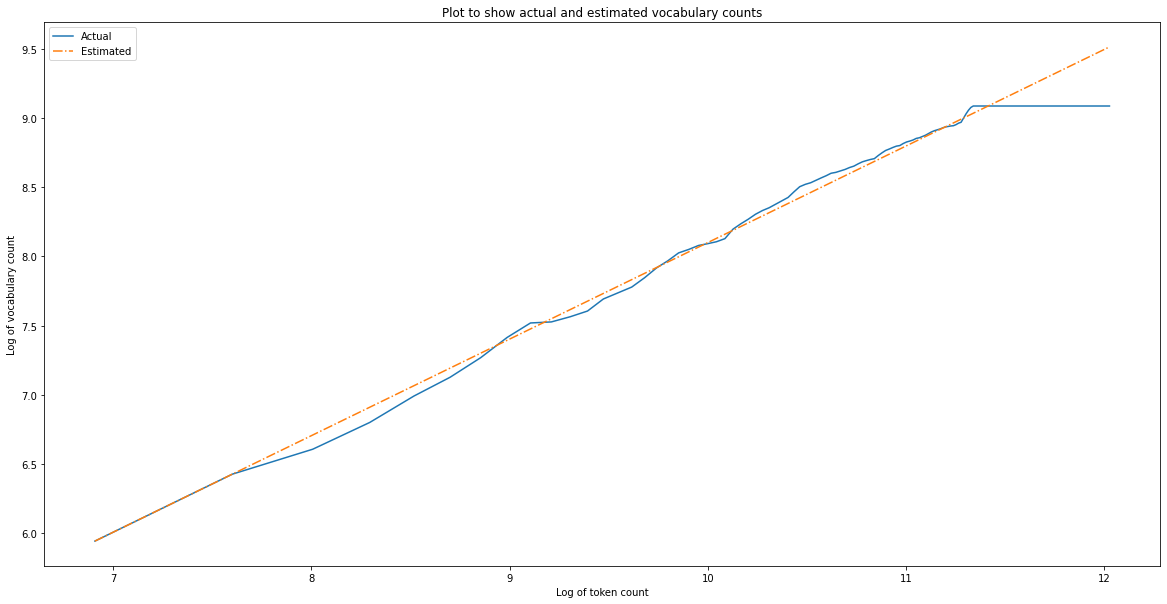

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(log_t, log_v, label = "Actual")
plt.plot(log_t, heaps_vocab_estimate, label = "Estimated", linestyle='dashdot')
plt.xlabel("Log of token count")
plt.ylabel("Log of vocabulary count")
plt.title("Plot to show actual and estimated vocabulary counts")

plt.legend()

plt.show()

# Application of Heaps Law

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('gutenberg')

[nltk_data] Downloading package stopwords to /home/ram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/ram/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [22]:

from nltk.corpus import stopwords
#get the stop words for English
stop_words = set(stopwords.words('english'))
words_bryant = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))
words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
#convert to small letters
words_bryant = [word.lower() for word in words_bryant if word.isalpha()]
words_emma = [word.lower() for word in words_emma if word.isalpha()]
#remove stop words
words_bryant = [word.lower() for word in words_bryant if word not in stop_words][:15000]
words_emma = [word.lower() for word in words_emma if word not in stop_words][:15000]
TTR_bryant = len(set(words_bryant))/len(words_bryant)
TTR_emma = len(set(words_emma))/len(words_emma)
print('Number of tokens, Vocabulary, Type-token ratio (Bryant stories) = ', len(words_bryant), len(set(words_bryant)), TTR_bryant)
print('Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) = ', len(words_emma), len(set(words_emma)), TTR_emma)

Number of tokens, Vocabulary, Type-token ratio (Bryant stories) =  15000 2796 0.1864
Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) =  15000 3274 0.21826666666666666


>>
---
>> # **<font color='orange'>$$Zipf's Law$$ </font>**
>> ## According to Zipf's law, the frequency of the word is inversely proportional to its rank.
>> ## $$\begin{align}
 f_w &\propto \frac{1}{r^{\alpha}} \\
 f_w &= \kappa \frac{1}{r^{\alpha}}\\
 f_w\times r^{\alpha} &= \kappa
  \end{align}$$
>> ## where $\kappa$ is a constant, $f_w$ is the frequency of a word, and $r$ is its rank.
>> ## Here $\alpha$ is usually between $0.9$ and $1.0$
>> #
>> #
---

# Plotting the frequency and rank

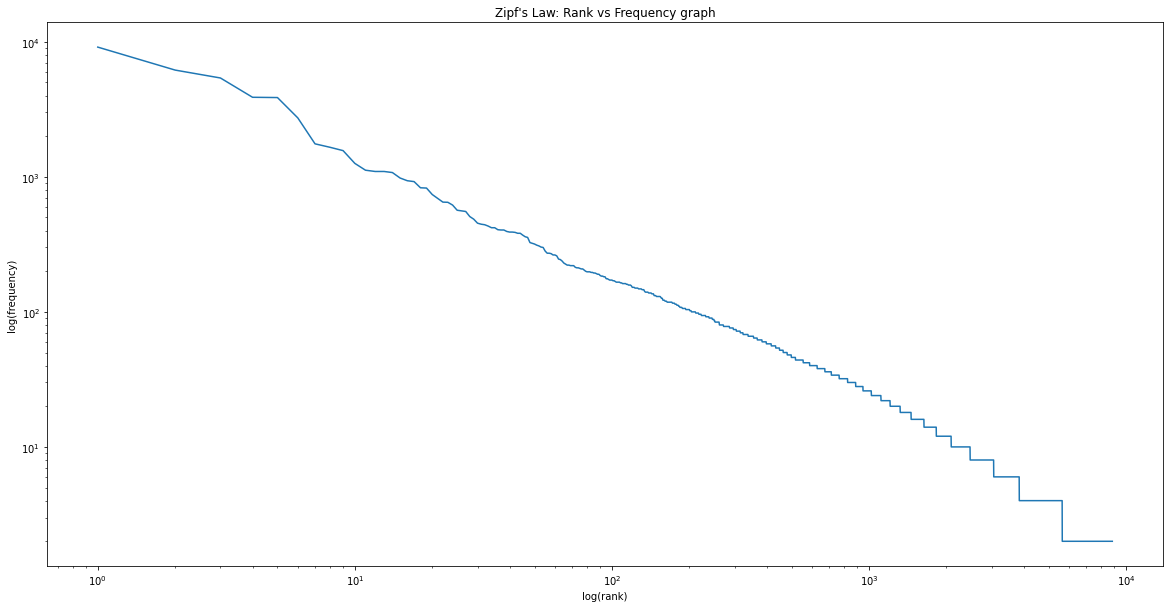

In [23]:
from operator import itemgetter
v = {}
for key, value in reversed(sorted(token_frequency.items(), key = itemgetter(1))):
    v[key] = value
    
# Plotting Zipf's Law
import matplotlib.pyplot as plt
import math

#Getting the values needed to plot
#You may use the RHS values in the plotting function directly
n = len(v.keys())
y = list(v.values())
x = list(range(1, n+1))
 
plt.plot(x, y)
 
#choosing log scale
plt.rcParams["figure.figsize"] = (20,10)

plt.yscale("log")
plt.xscale("log")

# naming the x axis
plt.ylabel('log(frequency)')
# naming the y axis
plt.xlabel('log(rank)')
 

plt.title("Zipf's Law: Rank vs Frequency graph")

#If you want to save the plot, use the next instruction
#plt.savefig("zipfs190522.png") 

# function to show the plot
plt.show()

In [24]:
#

# Exercise for you to try. How do you estimate the $\alpha$ value using the drequency and rank?
## Hint: $k$ is constant :)

In [25]:
# normalized term frequency

In [26]:
normalized_tf = {key: value/number_of_tokens for key, value in token_frequency.items()}
list(normalized_tf.items())[:15]

[('the', 0.05456369346883695),
 ('first', 0.0009076035683150817),
 ('step', 0.00011942152214672128),
 ('in', 0.023084180230961225),
 ('fighting', 8.359506550270489e-05),
 ('epidemic', 0.00011942152214672128),
 ('was', 0.005851654585189343),
 ('nationwide', 9.553721771737702e-05),
 ('lock', 2.3884304429344255e-05),
 ('down', 0.00011942152214672128),
 ('on', 0.0055053321709638515),
 ('march', 0.00023884304429344256),
 ('th', 0.000465743936372213),
 ('such', 0.001862975745488852),
 ('a', 0.016312979925242128)]

In [27]:
#finding alpha value - 
#Frequency is known, rank is known



>>
---
>> # **<font color='orange'>$$Alternate\, Representation\, of\,Words $$ </font>**
>> ## Is there any way to represent the words apart from term frequency?
>>
---


# Vector space
# One  Hot vector

In [28]:
# One-hot encoding
import numpy as np
vocab = sorted(list(set(tokens)))
print(len(vocab))
small_vocab = vocab[-200:-190]

#generate one-hot encoding
ohv_dict = {}
for i,token in enumerate(small_vocab):
    ohv_temp = np.zeros(len(small_vocab))
    ohv_temp[i] = 1
    ohv_dict[token] = ohv_temp
ohv_dict


8841


{'well-characterised': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'well-developed': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'well-preserved': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'well-rounded': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'went': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'were': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'west': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'western': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'wet': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'wetzlar': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

# Cosine distance
# Cosine distance betweeen any two vectors $u and v$ is defined as

## $1 - \dfrac{u.v}{||u||_2||v||_2}$

## $\color{red}{color2}$
## $\color{darkorange}{color3}$
## $\color{yellow}{color3}$

In [49]:
###### 
from scipy.spatial import distance
color1 = [255,255,255] # white
color2 = [255,0,0] # red
color3 = [255,144,0] # orange
color4 = [255,164,0] # lighter shade of orange
color5 = [0,0,255] # Blue
color6 = [0,255,0] # Green

print(distance.cosine(color1,color4)) # between white and lighter shade of orange
print(distance.cosine(color1,color2)) # between white and red
print(distance.cosine(color1,color3)) # between white and orange
print(distance.cosine(color1,color4)) # between white and lighter shade of orange

print(distance.cosine(color3,color4)) # between orange and lighter shade of ornge
print(distance.cosine(color2,color5)) # between red and blue
print(distance.cosine(color2,color6)) # between red and green

0.20210448218137755
0.42264973081037416
0.21337571476754802
0.20210448218137755
0.0016510660689108558
1.0
1.0


# Contextual represetation using bigrams, trigrams, etc

from nltk.util import ngrams

# bigrams
bigrams = nltk.ngrams(nltk.word_tokenize("the staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment"),2)
for bigram in bigrams:
    print(bigram)

In [29]:
# Trigrams
trigrams = nltk.ngrams(nltk.word_tokenize("the staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment"),3)
for trigram in trigrams:
    print(trigram)

('the', 'staff', 'has')
('staff', 'has', 'undergone')
('has', 'undergone', 'on-line')
('undergone', 'on-line', '36-hour')
('on-line', '36-hour', 'training')
('36-hour', 'training', 'course')
('training', 'course', 'to')
('course', 'to', 'become')
('to', 'become', 'qualified')
('become', 'qualified', 'in')
('qualified', 'in', 'coronavirus')
('in', 'coronavirus', 'infection')
('coronavirus', 'infection', 'treatment')


# Coals demo

In [36]:
!pip install tqdm
!pip install pandas
import pandas as pd
from tqdm import tqdm
def coals_svd_50(tokens):
    '''
    Computing the COALS-SVD with vector size 50. First calculate the cooccurence matrix,
    then find the correlation matrix, make negative values zero, and compute square root.
    Then compute SVD and reconstruct with vector size 50.
    '''
    # freq, vocab = get_freq_vocab(tokens)
    #for n, i in enumerate(freq.items()):
    #    if i[0]=='patient':
    #        break
    vocab = set(tokens)
    vocab_dict = {word: i for i, word in enumerate(vocab)}
    # vocab_open_14k_dict = {word: i for i, word in enumerate(vocab[n:14000+n])}
    vocab = set(vocab_dict.keys())
    #vocab_open_14k = set(vocab_open_14k_dict.keys())

    tokens_size = len(tokens)
    
    coocc_mat = np.zeros((len(vocab), len(vocab)), dtype = 'float64')
    for n, token in tqdm(enumerate(tokens)):
        if token in vocab:
            if n-4 < 0:
                ramp = 5-n
            else:
                ramp = 1
            for context in tokens[max(0,n-4):n]:
                if context in vocab:
                    coocc_mat[vocab_dict[token], vocab_dict[context]] += ramp
                ramp += 1
            ramp = 4
            for context in tokens[n+1:min(n+5, tokens_size)]:
                if context in vocab:
                    coocc_mat[vocab_dict[token], vocab_dict[context]] += ramp
                ramp -= 1
    corr_mat = np.zeros_like(coocc_mat)
    T = np.sum(coocc_mat)
    t1 = np.sum(coocc_mat, axis = 1)
    t2 = np.sum(coocc_mat, axis = 0)
    for i in tqdm(range(coocc_mat.shape[0])):
        for j in range(coocc_mat.shape[1]):
            if np.sqrt(t1[i]*t2[j]*(T-t1[i])*(T-t2[j])) == 0:
                corr_mat[i,j] = 0
            else:
                corr_mat[i,j] = (T*coocc_mat[i,j] - t1[i]*t2[j])/np.sqrt(t1[i]*t2[j]*(T-t1[i])*(T-t2[j]))
    
    corr_mat = np.where(corr_mat < 0, 0, corr_mat)
    corr_mat = np.sqrt(corr_mat)

    df = pd.DataFrame(corr_mat, index = vocab_dict, columns = vocab_dict)

    print('Computing SVD of the COALS matrix')
    coals_svd = np.linalg.svd(corr_mat, full_matrices=False)
    U, s, V = coals_svd
    word_embedding_mat = coocc_mat @ V[:50, :].T @ np.linalg.inv(np.diag(s[:50]))

    return word_embedding_mat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# SVD demonstration 
# Dimensionality reduction

In [37]:
svd = coals_svd_50(tokens)
svd

167474it [00:00, 179952.64it/s]
100%|███████| 8841/8841 [04:42<00:00, 31.32it/s]


Computing SVD of the COALS matrix


array([[-0.33831734, -0.00274146,  0.72643372, ...,  0.50897858,
         0.25422821, -0.55140672],
       [-0.48433613,  0.0439202 ,  0.04024856, ..., -0.16097221,
         0.07253056,  0.91230033],
       [-0.16248241,  0.01623565, -0.14209197, ...,  0.10825691,
         0.03581923,  0.08903046],
       ...,
       [-0.26034347, -0.02900768,  1.49967888, ..., -0.32270406,
        -0.375935  , -1.1326751 ],
       [-0.2983487 ,  0.03090739, -0.01334157, ..., -0.17880334,
         0.53173934,  0.57526073],
       [-0.29548272,  0.014207  , -0.28309006, ...,  0.22643805,
        -0.02682503, -0.47837723]])

# Dense word vector example

In [42]:
print("Word vector for the word ",vocab[120], " is")
svd[120]


Word vector for the word  account  is


array([-0.2925042 ,  0.02643709, -0.05765088,  0.29640502, -1.04188041,
       -0.02012696, -0.75658573, -0.71652089, -0.28435425, -0.57901226,
        0.23523265, -0.31948459, -0.51506022,  0.60379771,  0.1744162 ,
        0.41833177, -0.56892499, -0.37937864, -0.53164005, -0.36128039,
        0.9790094 , -0.45769533,  0.20640924, -0.12998105,  0.23773029,
       -0.16289221,  0.21326629, -0.3101611 ,  0.00422974,  0.23322274,
        0.1048798 ,  0.18417085, -0.11323803,  0.65997248,  0.05493571,
        0.38121971,  0.33084651, -0.18229207,  0.30624401,  0.09493249,
       -0.02024003,  0.09467948,  0.06256469,  0.02138615,  0.20333954,
        0.10040016, -0.15792841, -0.23854205, -0.03741757, -1.84003522])

(768, 1024)


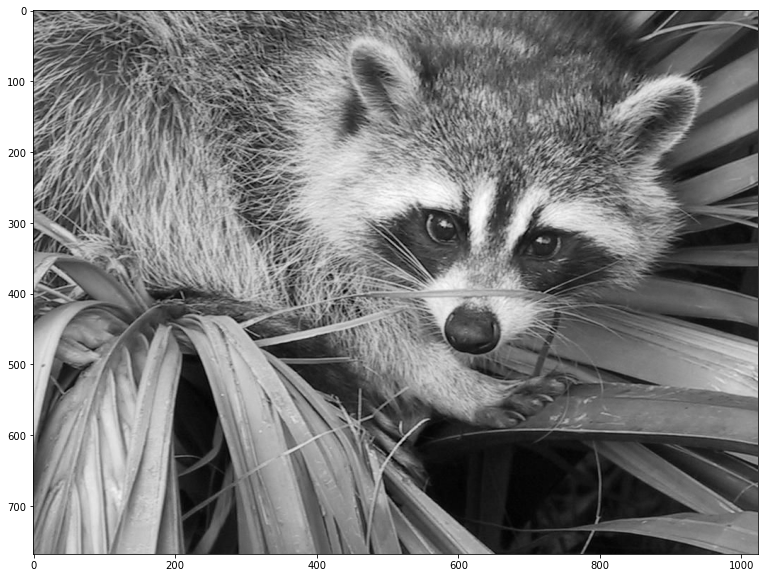

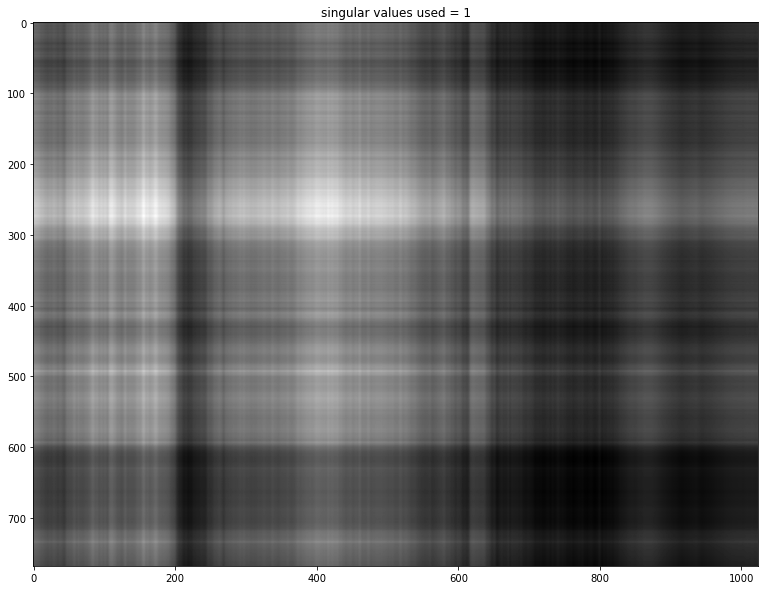

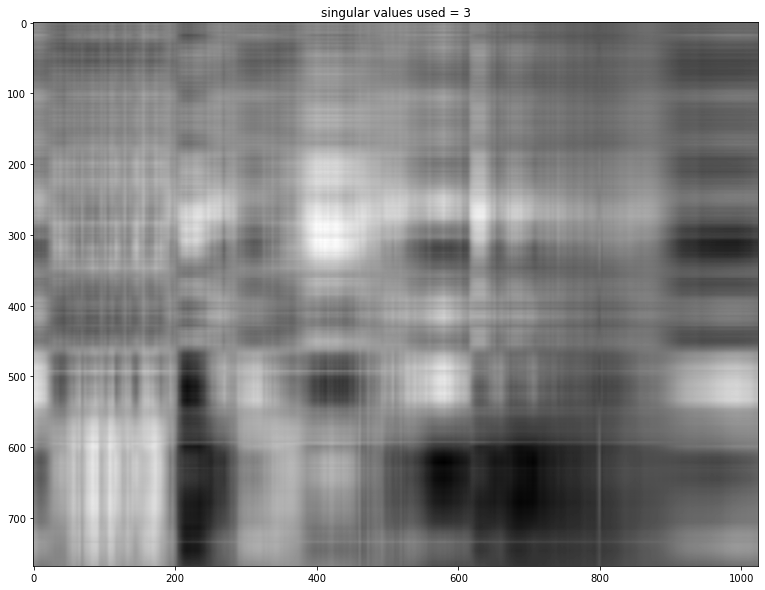

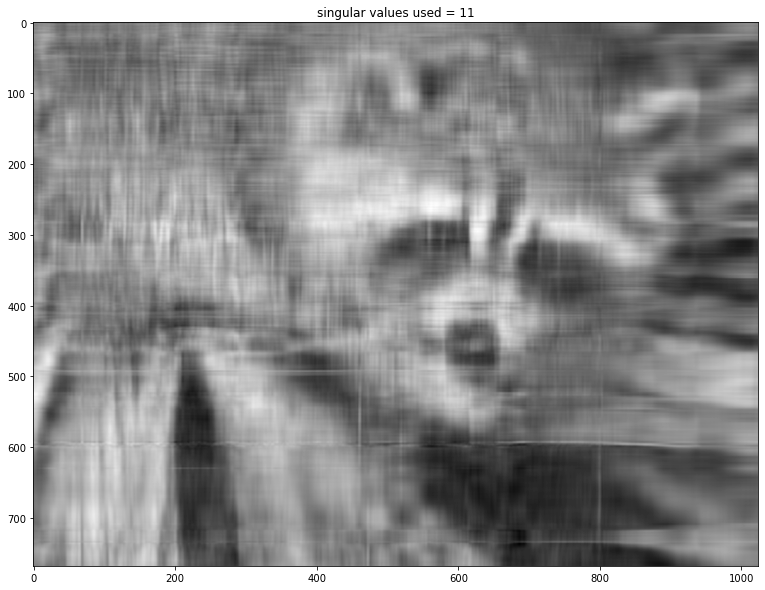

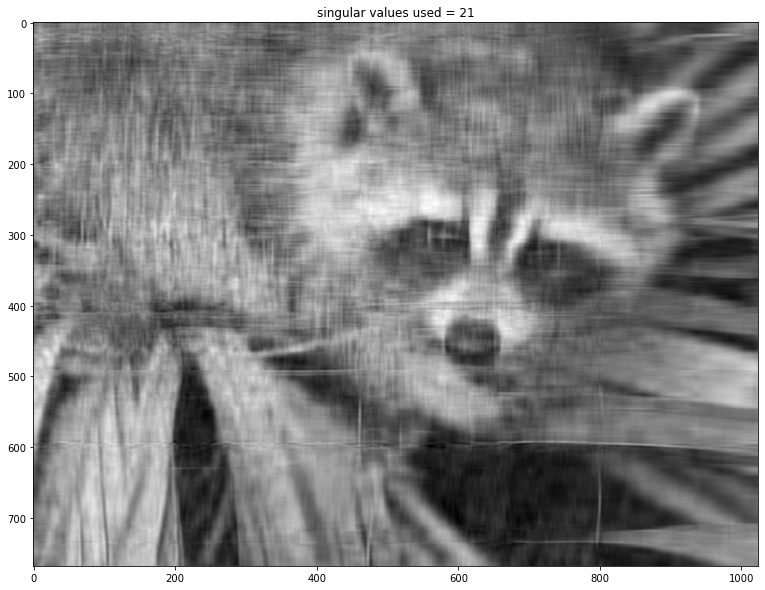

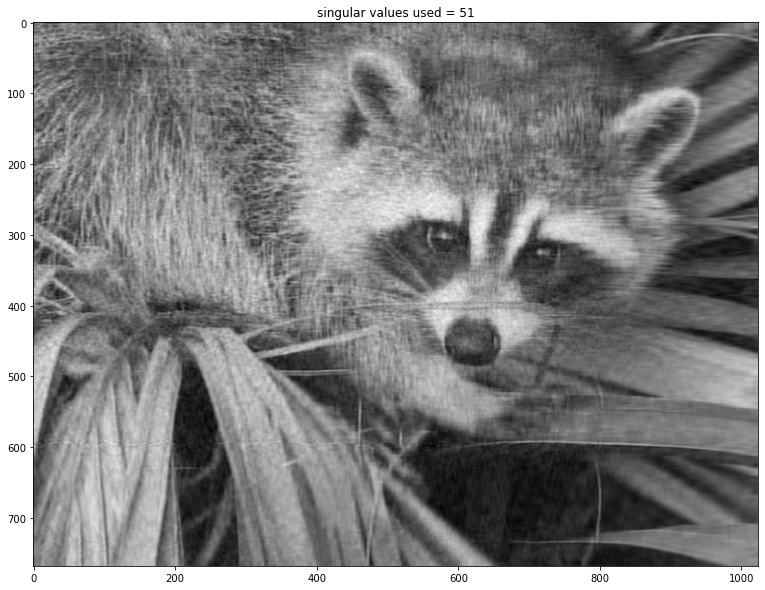

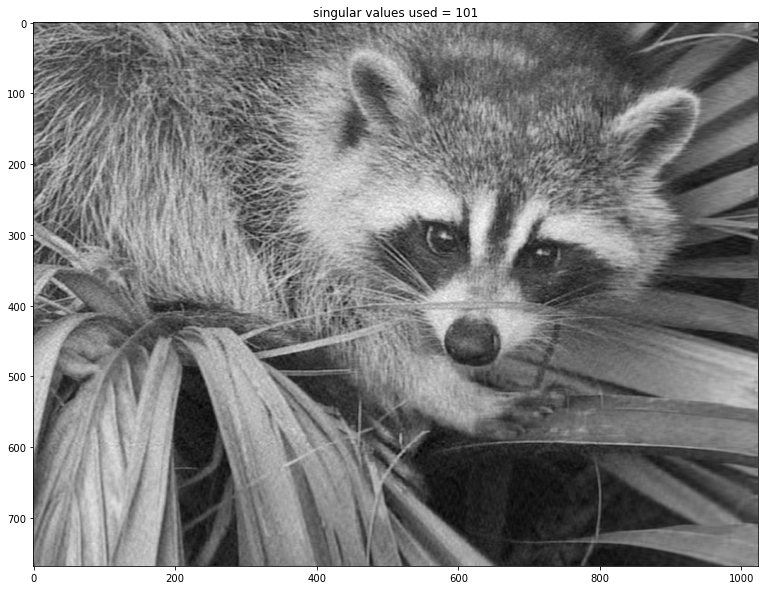

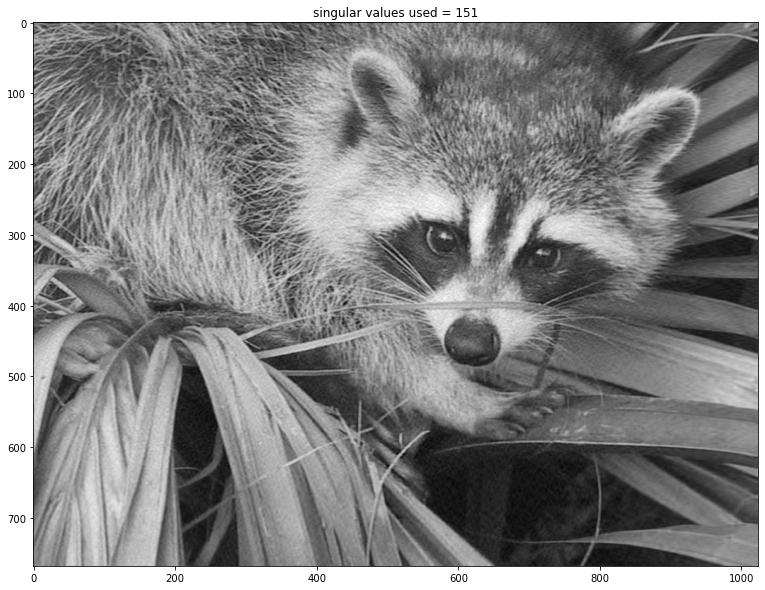

In [245]:

import scipy.misc as s
import pylab
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt


x = s.face(gray=True)
print(x.shape)
plt.imshow(x, cmap='gray')
plt.show()
U,S,V = np.linalg.svd(x, full_matrices=False)
for i in  (0,2,10,20,50,100,150):
    new_image = np.matrix(U[:, :i+1]) * np.diag(S[:i+1]) * np.matrix(V[:i+1, :])
    plt.imshow(new_image, cmap='gray')
    title = "singular values used = %s" % (i+1)
    plt.title(title)
    plt.show()